
### Mercedes-Benz Greener Manufacturing
Can you cut the time a Mercedes-Benz spends on the test bench?

* https://www.kaggle.com/c/mercedes-benz-greener-manufacturing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
base_path = "data"
train = pd.read_csv(f'{base_path}/train.csv.zip', index_col="ID")
test = pd.read_csv(f'{base_path}/test.csv.zip', index_col="ID")
submission = pd.read_csv(f'{base_path}/sample_submission.csv.zip', index_col="ID")

In [3]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
1,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
2,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
3,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
4,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
5,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot: >

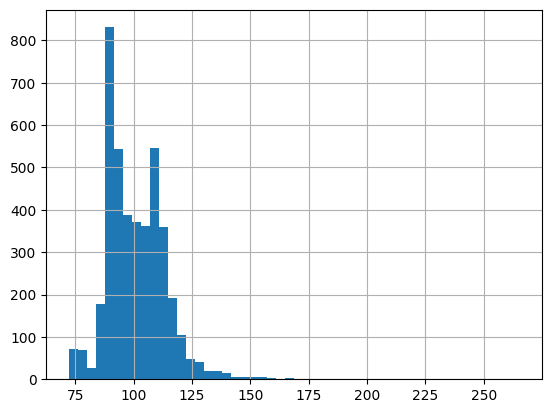

In [5]:
train["y"].hist(bins=50)

<AxesSubplot: xlabel='y'>

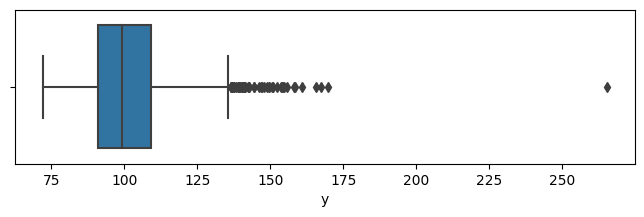

In [6]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=train, x="y")

<AxesSubplot: xlabel='ID', ylabel='y'>

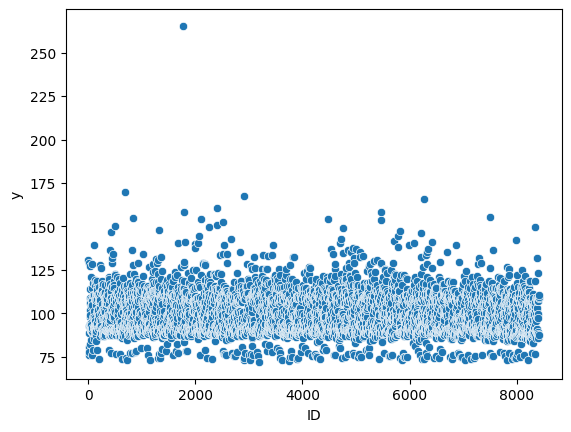

In [7]:
sns.scatterplot(data=train, x=train.index, y="y")

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 8417
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


In [9]:
train.isnull().sum().sum()

0

In [10]:
train.describe()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
num_desc = train.drop(columns="y").describe()
num_desc

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
num_desc.loc["min"].describe()

count    368.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: min, dtype: float64

In [13]:
num_desc.loc["max"].describe()

count    368.000000
mean       0.967391
std        0.177852
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: max, dtype: float64

In [14]:
train_skew = train.drop(columns="y").select_dtypes(include="number").skew()
train_skew.describe().round(2)

count    368.00
mean      11.03
std       16.59
min      -64.88
25%        1.27
50%        5.58
75%       13.42
max       64.88
dtype: float64

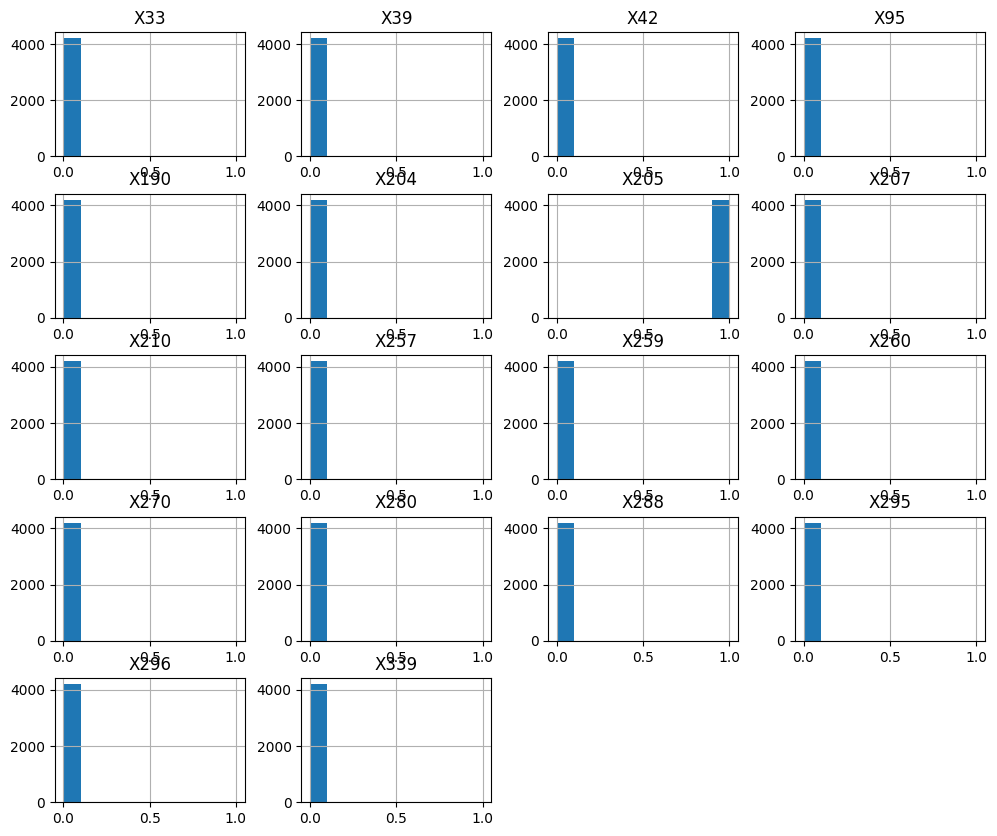

In [15]:
train[train_skew[abs(train_skew) > 50].index].hist(figsize=(12, 10));

In [16]:
train_kurt = train.drop(columns="y").select_dtypes(include="number").kurt()
train_kurt.describe().round(2)

count     368.00
mean      394.36
std       958.89
min        -2.00
25%         2.99
50%        32.32
75%       186.55
max      4209.00
dtype: float64

In [17]:
corr = train.select_dtypes(include="number").corr()
corr

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
y,1.000000,-0.026985,NaN,0.089792,0.048276,0.193643,0.023116,0.048946,-0.159815,-0.001789,...,0.029100,0.114005,0.061403,-0.258679,0.067919,0.040932,-0.159815,0.040291,-0.004591,-0.022280
X10,-0.026985,1.000000,NaN,-0.033084,-0.028806,-0.100474,-0.002532,-0.005944,-0.010164,-0.010323,...,0.165277,-0.028618,-0.074244,-0.016870,-0.011374,-0.010479,-0.010164,-0.004740,-0.002532,-0.004387
X11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X12,0.089792,-0.033084,NaN,1.000000,0.214825,-0.246513,-0.006212,-0.014584,-0.024937,-0.025327,...,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.006212,-0.010765
X13,0.048276,-0.028806,NaN,0.214825,1.000000,-0.083141,-0.005409,-0.012698,-0.021713,-0.010525,...,-0.169721,-0.061136,0.357229,-0.036040,-0.024299,0.023045,-0.021713,-0.010125,0.041242,-0.009373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,0.040932,-0.010479,NaN,-0.005566,0.023045,0.007743,-0.001968,-0.004619,-0.007899,-0.008022,...,-0.061741,-0.022240,-0.061168,-0.013110,-0.008839,1.000000,-0.007899,-0.003683,-0.001968,-0.003410
X382,-0.159815,-0.010164,NaN,-0.024937,-0.021713,0.012713,-0.001908,-0.004480,1.000000,0.085256,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307
X383,0.040291,-0.004740,NaN,-0.011628,-0.010125,0.023604,-0.000890,-0.002089,-0.003572,0.062481,...,-0.015413,-0.010059,0.035107,-0.005930,-0.003998,-0.003683,-0.003572,1.000000,-0.000890,-0.001542
X384,-0.004591,-0.002532,NaN,-0.006212,0.041242,0.025199,-0.000475,-0.001116,-0.001908,-0.001938,...,-0.014917,-0.005373,0.008694,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,1.000000,-0.000824


<AxesSubplot: >

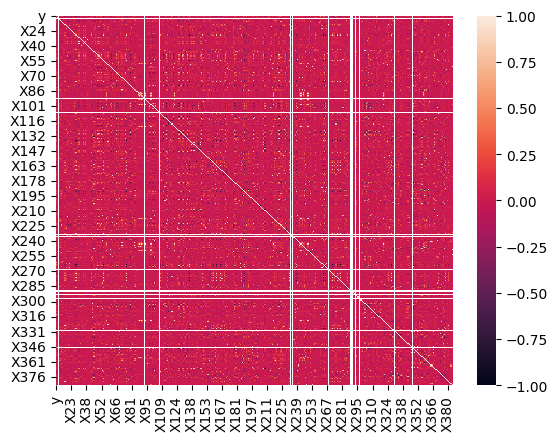

In [18]:
sns.heatmap(corr)

In [19]:
desc_obj = train.describe(include="object")
desc_obj

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [20]:
for obj_col in desc_obj.columns:
    display(train[obj_col].value_counts().to_frame().T)

,z,ak,y,ay,t,x,o,f,n,w,...,r,as,bc,ao,c,aa,q,ac,g,ab
X0,360,349,324,313,306,300,269,227,195,182,...,10,10,6,4,3,2,2,1,1,1


,aa,s,b,l,v,r,i,a,c,o,...,y,f,j,n,k,p,g,d,q,ab
X1,833,598,592,590,408,251,203,143,121,82,...,23,23,22,19,17,9,6,3,3,3


,as,ae,ai,m,ak,r,n,s,f,e,...,p,au,am,j,af,l,aa,c,o,ar
X2,1659,496,415,367,265,153,137,94,87,81,...,4,3,1,1,1,1,1,1,1,1


,c,f,a,d,g,e,b
X3,1942,1076,440,290,241,163,57


,d,a,b,c
X4,4205,2,1,1


,w,v,q,r,s,d,n,p,m,i,...,j,aa,ah,o,f,x,y,g,h,u
X5,231,231,220,215,214,214,212,208,208,207,...,125,112,97,20,7,2,1,1,1,1


,g,j,d,i,l,a,h,k,c,b,f,e
X6,1042,1039,625,488,478,206,190,43,38,28,20,12


,j,s,f,n,i,e,r,a,w,v,...,u,t,q,h,y,x,d,l,p,c
X8,277,255,243,242,237,225,219,210,196,194,...,119,119,117,117,116,105,103,101,100,100


In [21]:
nunique_count = train.drop(columns="y").nunique()
nunique_one = nunique_count[nunique_count == 1]
nunique_one

X11     1
X93     1
X107    1
X233    1
X235    1
X268    1
X289    1
X290    1
X293    1
X297    1
X330    1
X347    1
dtype: int64

In [22]:
train = train.drop(columns=nunique_one.index)
test = test.drop(columns=nunique_one.index)

train.shape, test.shape

((4209, 365), (4209, 364))

In [23]:
nunique_count[nunique_count == 2].index

Index(['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=356)

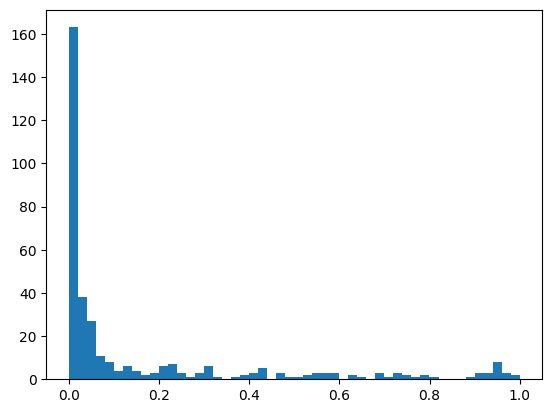

In [24]:
plt.hist(train[nunique_count[nunique_count == 2].index].mean(), bins=50);

In [25]:
# 0과 1 두 가지로 되어있는 값의 평균에 대한 기술 통계
train[nunique_count[nunique_count == 2].index].mean().describe()

count    356.000000
mean       0.162987
std        0.269748
min        0.000238
25%        0.005227
50%        0.024115
75%        0.202008
max        0.999762
dtype: float64

In [26]:
label_name = "y"

X_train = train.drop(columns=label_name)
y_train = train[label_name]
X_test = test

X_train.shape, y_train.shape, X_test.shape

((4209, 364), (4209,), (4209, 364))

In [27]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model

ExtraTreesRegressor()